<a href="https://colab.research.google.com/github/marquesbmc/Artificial-Intelligence/blob/main/GRIDENV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Código de Q-learning em uma Grade 7x7

Este notebook apresenta a implementação de um agente que aprende a navegar em uma grade 7x7 para alcançar um ponto de objetivo **G** usando Q-learning. O agente sempre começa da posição **P** = (3,3), enquanto **G** é definido aleatoriamente a cada execução, mas sempre é diferente de **P**.

Componentes Principais:
1. Função get_goal_point():
Esta função gera uma posição aleatória para o objetivo **G** na grade, garantindo que não seja igual à posição inicial  **P**.

2. Classe Entity:
Representa uma entidade genérica na grade. Cada entidade tem um ID e uma posição.

3. Classe Agent:
Derivada de Entity.
Representa um agente que pode se mover pela grade.
Mantém uma tabela Q (state_actions) para rastrear o valor de cada ação em cada estado.
Usa uma estratégia epsilon-greedy para escolher ações.
Contém a função play para treinar o agente durante várias rodadas.
Mantém um registro dos estados visitados (visited_states).
4. Classe GridEnv:
Representa o ambiente de grade 7x7.
Contém métodos para mover entidades, calcular recompensas e visualizar o caminho tomado pelo agente.
O objetivo **G** é definido nesta classe.
5. Função main():
Inicializa o ambiente e o agente.
Treina o agente por 500 rodadas e visualiza sua performance.
Testa a política aprendida pelo agente e visualiza o caminho tomado.
Observações:
Estratégia Epsilon-Greedy: No início, o agente explora completamente, mas à medida que aprende, explora menos e explota mais o que aprendeu.

Recompensas e Penalidades: O agente é recompensado ao atingir o objetivo e penalizado por movimentos ineficientes ou por visitar estados já visitados.

Visualização: O código inclui uma função útil para visualizar o caminho do agente na grade.

Limitações Potenciais: O código parece ter um limite de 100 movimentos ao testar o agente. Além disso, a implementação da classe GridEnv parece estar incompleta.

## Estratégias de otimização do RF

### 1.Taxa de Exploração (Epsilon) no Q-learning


A Taxa de Exploração, frequentemente denotada como **ϵ**, é um componente fundamental no aprendizado por reforço, particularmente ao usar a estratégia epsilon-greedy. Ela determina a probabilidade de o agente escolher uma ação aleatória (explorar) em vez de escolher a ação que atualmente acredita ser a melhor (explorar).

Inicialização dos Atributos:
Na classe Agent, os atributos relacionados à taxa de exploração são inicializados da seguinte forma:

python
Copy code
self.exp_rate = 1  # 100% chance de escolher uma ação aleatória no início
self.exp_rate_decay = 0.995  # Taxa de decaimento do epsilon após cada episódio
self.exp_rate_min = 0.1  # Valor mínimo para a taxa de exploração
Escolha de Ações:
O método chooseAction decide qual ação o agente deve tomar:

```
def chooseAction(self):
    action = np.random.choice(self.actions) if np.random.uniform(0, 1) <= self.exp_rate else max(self.actions, key=lambda a: self.state_actions[self.pos][a])
    return action
```
Dentro deste método:

Se um número aleatório entre 0 e 1 for menor ou igual a self.exp_rate, o agente escolhe uma ação aleatória (explorando o ambiente).
Caso contrário, ele escolhe a ação com o maior valor Q para o estado atual (explorando o conhecimento adquirido).
Política de Decaimento:
A taxa de exploração não permanece constante. Ela decai com o tempo para fazer a transição do agente da exploração para a exploração. A política de decaimento é implementada no método play:

```
self.exp_rate = max(self.exp_rate * self.exp_rate_decay, self.exp_rate_min)
```
Após cada episódio de treinamento:

A self.exp_rate é multiplicada pelo fator de decaimento self.exp_rate_decay.
No entanto, a self.exp_rate nunca cai abaixo de self.exp_rate_min, garantindo que o agente mantenha alguma probabilidade de explorar, mesmo depois de muito treinamento.
Conclusão:
A estratégia epsilon-greedy, guiada pela Taxa de Exploração, garante que o agente tenha um equilíbrio entre explorar novas ações e explorar o conhecimento adquirido. Inicialmente, o agente tende a explorar mais, mas com o tempo e o aprendizado, ele começa a confiar mais em suas decisões baseadas no que já aprendeu.

### 2. Inicializar Valores Q Diferentemente:

No Q-learning, a tabela Q é uma representação do valor de cada ação em cada estado. Os valores Q são atualizados à medida que o agente aprende, mas a inicialização desses valores pode influenciar a velocidade e eficácia do aprendizado.

Implementação no Código:
```
self.state_actions = {(i, j): {a: np.random.rand() - 0.05 for a in self.actions} for i in range(WIDTH) for j in range(HEIGHT)}
```
Em vez de inicializar todos os valores Q com zero, o código opta por inicializá-los com pequenos valores aleatórios perto de zero (no intervalo de -0.05 a 0.95). Isso pode promover a exploração inicial de diferentes ações e estados, reduzindo potenciais empates entre ações nas fases iniciais.

### 3. Política de Decaimento:

A política de decaimento é uma estratégia para reduzir a taxa de exploração ao longo do tempo. Isso garante que, no início, o agente explore mais o ambiente, mas à medida que aprende, ele começa a confiar mais no seu conhecimento.

Implementação no Código:
```
self.exp_rate = max(self.exp_rate * self.exp_rate_decay, self.exp_rate_min)
```
Após cada episódio de treinamento, a taxa de exploração é multiplicada pelo fator de decaimento self.exp_rate_decay. No entanto, ela nunca cai abaixo de self.exp_rate_min, garantindo que haja sempre alguma chance de exploração.

### 4. Recompensas Negativas por Movimentos:

Recompensar ou penalizar o agente por suas ações é fundamental no aprendizado por reforço. Recompensas negativas por movimentos podem desencorajar o agente de fazer movimentos desnecessários ou ineficientes.

Implementação no Código:
```
penalidade_base = NON_GOAL_PENALTY
fator_incremental = 0.01
movimentos_feitos = len(Entity.states)
penalidade_por_movimento = penalidade_base + (movimentos_feitos * fator_incremental)
```
O agente é penalizado por cada movimento. A penalidade base é de -1, mas há uma penalidade incremental com base no número de movimentos já realizados. Isso pode desencorajar o agente de fazer movimentos excessivos e incentivá-lo a encontrar o caminho mais eficiente para o objetivo.

### 5. Implementar uma Estratégia de Visitação:

Manter um registro dos estados visitados pode ser útil para evitar que o agente repita movimentos desnecessários e incentive a exploração de novos estados.

Implementação no Código:
```
self.visited_states = {(i, j): 0 for i in range(WIDTH) for j in range(HEIGHT)}
```
O agente mantém um registro dos estados que visitou. Cada vez que visita um estado, esse registro é incrementado:
```
self.visited_states[self.pos] += 1
```
Ao calcular a recompensa, o agente é penalizado por revisitar estados:
```
visited_penalty = Entity.visited_states[Entity.pos] * -2
```
A penalidade é duas vezes o número de vezes que o estado foi visitado. Isso desencoraja o agente de revisitar estados repetidamente, promovendo a exploração de novos estados.

# Código

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt




def get_goal_point():
    while True:
        x = np.random.randint(0, WIDTH)
        y = np.random.randint(0, HEIGHT)
        if (x,y) != P:
            return (x,y)

# Constantes
WIDTH = 7  # Largura do ambiente
HEIGHT = 7  # Altura do ambiente
P = (3, 3)
G = (6,1) #get_goal_point()
EMPTY = -1  # Representação de uma célula vazia
GOAL_REWARD = 100  # Recompensa ao atingir o objetivo
NON_GOAL_PENALTY = -1  # Penalização para movimentos que não atingem o objetivo
INVALID_MOVE_PENALTY = -20  # Defina esta constante na parte superior do código

## RNN

In [2]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from collections import deque

class DQN:
    def __init__(self, input_dim, output_dim, lr=0.001, batch_size=64, gamma=0.99, buffer_size=10000):
        self.model = self._build_model(input_dim, output_dim, lr)
        self.target_model = self._build_model(input_dim, output_dim, lr)
        self.update_target_model()
        self.buffer = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.gamma = gamma

    def _build_model(self, input_dim, output_dim, lr):
        inputs = Input(shape=(input_dim,))
        x = Dense(128, activation='relu')(inputs)
        x = Dropout(0.5)(x)  # Adicionando dropout após a primeira camada densa
        x = Dense(64, activation='relu')(x)
        outputs = Dense(output_dim, activation='linear')(x)

        model = Model(inputs=inputs, outputs=outputs)
        model.compile(loss='mse', optimizer=Adam(lr=lr))
        return model

    def predict(self, state):
        return self.model.predict(np.array([state]))[0]

    def store_experience(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def train(self):
        if len(self.buffer) < self.batch_size:
            return

        batch = np.array(random.sample(self.buffer, self.batch_size))
        states = np.array(batch[:, 0].tolist())
        actions = batch[:, 1].astype(int)
        rewards = batch[:, 2]
        next_states = np.array(batch[:, 3].tolist())
        dones = batch[:, 4].astype(int)

        curr_Q = self.model.predict(states)
        next_Q = self.target_model.predict(next_states)
        max_next_Q = np.max(next_Q, axis=1)
        target_Q = rewards + (1 - dones) * self.gamma * max_next_Q

        # Update Q-values for the actions taken
        for idx, action in enumerate(actions):
            curr_Q[idx][action] = target_Q[idx]

        self.model.train_on_batch(states, curr_Q)

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # ... outros métodos relacionados ao DQN


### Entities

In [3]:
class Entity:
    current_id = 0  # ID atual (inicializado com 0)

    def __init__(self, env):
        Entity.current_id += 1  # Incrementa o ID
        self.id = Entity.current_id
        self.env = env  # Ambiente associado à entidade
        self.ini_pos = P
        #self.ini_pos = env.get_random_empty_cell()
        self.pos = self.ini_pos

In [4]:
class Agent(Entity):
    def __init__(self, env, input_dim, output_dim, lr=0.001):
        super().__init__(env)
        self.actions = ["up", "left", "right", "down"]  # Ações possíveis
        self.states = []  # Estados visitados

        self.dqn = DQN(input_dim, output_dim, lr)  # Inicializa a DQN
        self.exp_rate = 1  # Taxa de exploração:  100% de chance de escolher uma ação aleatória
        self.exp_rate_decay = 0.995  # taxa de decaimento
        self.exp_rate_min = 0.1     # valor mínimo para a taxa de exploração

        # Inicializa o registro de visitação
        self.visited_states = {(i, j): 0 for i in range(WIDTH) for j in range(HEIGHT)}
        self.invalid_move = False

    def chooseAction(self):
        # Escolhe ação baseada na estratégia epsilon-greedy
        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            state = self._state_representation(self.pos)
            q_values = self.dqn.predict(state)
            action_idx = np.argmax(q_values)
            action = self.actions[action_idx]
        self.states.append(self.pos)
        return action

    def _state_representation(self, position):
        # Uma função para converter a posição (ou qualquer outro aspecto do estado) em uma representação adequada para a DQN.
        # Aqui, assumimos uma representação simples baseada na posição, mas isso pode ser adaptado conforme necessário.
        return [position[0], position[1]]

    def step(self, action):
        next_state = self.env.nxtPosition(self, action)
        reward = self.env.giveReward(self)
        done = self.env.end

        # Armazena a experiência no buffer da DQN
        self.dqn.store_experience(self._state_representation(self.pos), self.actions.index(action), reward, self._state_representation(next_state), done)

        # Placeholder for additional information (can be used for debugging)
        info = {}

        # Treina a DQN com um mini-lote de experiências
        self.dqn.train()

        return next_state, reward, done, info


    def evaluate(self, episodes=10):
        total_rewards = []  # Lista para armazenar a recompensa total por episódio

        # Salva a taxa de exploração atual e define-a para 0, para que o agente use apenas sua política aprendida
        original_exp_rate = self.exp_rate
        self.exp_rate = 0

        for _ in range(episodes):
            episode_reward = 0  # Recompensa total para este episódio

            while not self.env.end:
                curr_state = self.pos
                action = self.chooseAction()  # Escolhe uma ação baseada na política aprendida

                # Move o agente e obtém recompensa
                next_state, reward, done, _ = self.step(action)
                episode_reward += reward

            total_rewards.append(episode_reward)  # Adiciona a recompensa total para este episódio à lista
            self.reset()

        # Restaura a taxa de exploração original
        self.exp_rate = original_exp_rate

        return total_rewards  # Retorna a lista de recompensas totais por episódio


    def learn(self, rounds=10):
        total_rewards = []  # Lista para armazenar a recompensa total por rodada

        for _ in range(rounds):
            total_reward = 0  # Recompensa total para esta rodada

            while not self.env.end:
                curr_state = self.pos
                action = self.chooseAction()

                # Move o agente e obtém recompensa
                next_state, reward, done, _ = self.step(action)  # Atualizamos esta linha para usar o método step
                total_reward += reward  # Acumula a recompensa

                # Atualiza o registro de visitação
                self.visited_states[self.pos] += 1

            # Decaimento da taxa de exploração
            self.exp_rate = max(self.exp_rate * self.exp_rate_decay, self.exp_rate_min)

            total_rewards.append(total_reward)  # Adiciona a recompensa total para esta rodada à lista
            self.reset()

        # Periodicamente, atualizamos o modelo alvo para que ele se aproxime do modelo atual
        self.dqn.update_target_model()

        return total_rewards  # Retorna a lista de recompensas totais


    def reset(self):
        self.states = []
        self.ini_pos = P
        self.pos = self.ini_pos
        self.env.reset()
        self.env.add_entity(self)

    def adjust_exp_rate(self, new_rate):
        self.exp_rate = new_rate


### GridEnv

In [5]:

class GridEnv:
    def __init__(self, grid_size_x=WIDTH, grid_size_y=HEIGHT):
        # Inicializa o ambiente
        self.end = False
        self.grid_size_x = grid_size_x
        self.grid_size_y = grid_size_y
        self.board = np.full([grid_size_x, grid_size_y], EMPTY)  # Cria uma matriz representando o ambiente
        self.entities = []  # Lista de entidades no ambiente

        #self.G = self.get_goal_point()
        self.G = G


    def add_entity(self, Entity):
        if self.board[Entity.pos] == EMPTY:
            """Adiciona uma entidade ao ambiente."""
            self.entities.append(Entity)
            self.board[Entity.pos] = Entity.id
        else:
            raise ValueError("board not empty in entity.pos")

    def move_entity(self, Entity, new_position):
        # If next position is within the grid and is empty
        if (0 <= new_position[0] < self.grid_size_x and 0 <= new_position[1] < self.grid_size_y and
            self.board[new_position] == EMPTY):

            # Update the previous position to empty
            self.board[Entity.pos] = EMPTY
            # Update the entity's position
            Entity.pos = new_position
            # Update the board with the entity's ID
            self.board[Entity.pos] = Entity.id
            return True  # Successful move

        return False  # Move not allowed

    def get_random_empty_cell(self):
        """Retorna uma célula vazia aleatória no board que não está na lista de entities."""
        empty_cells = np.argwhere(self.board == EMPTY)

        # Remover células que estão na lista de entities
        entity_positions = [entity.pos for entity in self.entities]
        empty_cells = [cell for cell in empty_cells if tuple(cell) not in entity_positions]

        if not empty_cells:
            raise ValueError("No empty cells available on the board!")

        return tuple(empty_cells[np.random.choice(len(empty_cells))])


    def reset(self):
        # Reinicia o ambiente para o estado inicial
        self.end = False
        self.board = np.full([self.grid_size_x, self.grid_size_y], EMPTY)
        self.entities = []
        self.G = G

    def nxtPosition(self, Entity, action):
        new_position = None

        # Calcula a próxima posição baseada na ação
        if action == "up":
            new_position = (Entity.pos[0]-1, Entity.pos[1])
        elif action == "down":
            new_position = (Entity.pos[0]+1, Entity.pos[1])
        elif action == "left":
            new_position = (Entity.pos[0], Entity.pos[1]-1)
        elif action == "right":
            new_position = (Entity.pos[0], Entity.pos[1]+1)

        # Check if the move is invalid (outside the grid)
        if (new_position[0] < 0 or new_position[0] >= self.grid_size_x or
            new_position[1] < 0 or new_position[1] >= self.grid_size_y):
            Entity.invalid_move = True
        else:
            Entity.invalid_move = False
            self.move_entity(Entity, new_position)

        distance = abs(Entity.pos[0] - self.G[0]) + abs(Entity.pos[1] - self.G[1])

        if distance <= 1:
            self.end = True

        return Entity.pos

    def giveReward(self, Entity):
        # Calcula a distância euclidiana entre Entity.pos e G
        distance = abs(Entity.pos[0] - self.G[0]) + abs(Entity.pos[1] - self.G[1])

        # Recompensa Incremental Baseada na Distância
        reward_based_on_distance = 1 / (distance + 1)

        # Penalização Incremental por Movimento
        penalidade_base = NON_GOAL_PENALTY
        fator_incremental = 0.01  # este valor pode ser ajustado
        movimentos_feitos = len(Entity.states)  # assumindo que Entity.states armazena os movimentos
        penalidade_por_movimento = penalidade_base + (movimentos_feitos * fator_incremental)


        # Check for invalid move of the agent
        if isinstance(Entity, Agent) and Entity.invalid_move:
            return INVALID_MOVE_PENALTY


        # Calcule a distância anterior (antes do movimento atual)
        prev_distance = abs(Entity.states[-1][0] - self.G[0]) + abs(Entity.states[-1][1] - self.G[1]) if Entity.states else distance

        # Determine a recompensa baseada na distância
        if distance < prev_distance:
            reward_based_on_distance = 2  # Recompensa positiva por se mover na direção certa
        else:
            reward_based_on_distance = -2  # Penalização por se mover na direção errada


        # Penalização por visitar um estado já visitado
        #visited_penalty = Entity.visited_states[Entity.pos] * -2

        #if not self.move_entity(Entity, Entity.pos):  # Tentativa de movimento inválido
         #   return INVALID_MOVE_PENALTY

        # Se o agente estiver perto do objetivo, ele receberá a recompensa com base na distância
        if distance <= 1:
            return GOAL_REWARD + reward_based_on_distance
        else:
            # Caso contrário, ele receberá a penalização incremental por movimento e a penalização por visitação
            return penalidade_por_movimento + reward_based_on_distance #+ visited_penalty



    def visualize_path(self, path):
        """
        Visualiza o caminho do agente no grid.

        Parâmetros:
        - path: lista de posições (tuplas) que o agente tomou.
        """

        # Cria uma representação do grid
        grid = np.zeros((self.grid_size_x, self.grid_size_y))

        # Marca o caminho do agente com 0.5
        for pos in path:
            grid[pos] = 0.5

        # Marca a posição inicial e final
        grid[path[0]] = 0.3  # início
        grid[path[-1]] = 0.7  # final

        # Marca o objetivo
        grid[self.G] = 1.0

        plt.imshow(grid, cmap="gray_r")
        plt.colorbar()

        # Adiciona os números das coordenadas
        for y in range(self.grid_size_y):
            for x in range(self.grid_size_x):
                plt.text(x, y, f"{y},{x}", ha="center", va="center", color="red", fontsize=8)

        plt.title("Caminho do Agente")
        plt.show()

### Main

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 0s 6ms/step


<ipython-input-2-869b65d5df93>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batch = np.array(random.sample(self.buffer, self.batch_size))


2/2 [==============================] - 0s 6ms/step


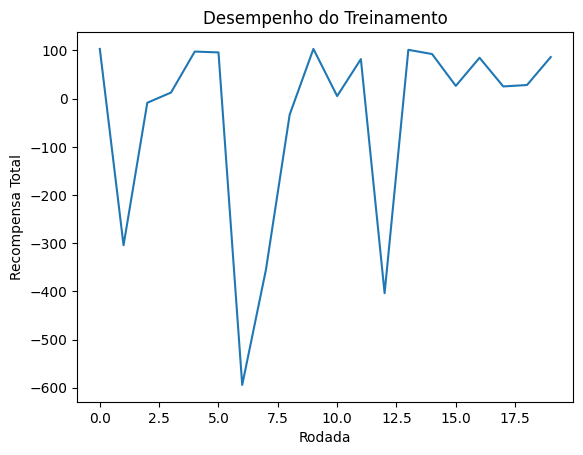

##### TESTE DE APRENDIZADO #####
2/2 [==============================] - 0s 6ms/step
Posição: (3, 3), Ação: left, Próxima Posição: (3, 2)
2/2 [==============================] - 0s 8ms/step
Posição: (3, 2), Ação: left, Próxima Posição: (3, 1)
2/2 [==============================] - 0s 7ms/step
Posição: (3, 1), Ação: down, Próxima Posição: (4, 1)
2/2 [==============================] - 0s 8ms/step
Posição: (4, 1), Ação: down, Próxima Posição: (5, 1)
Recompensa total durante o teste: 105.06

Melhor caminho encontrado:
Posição: (3, 3)
Posição: (3, 2)
Posição: (3, 1)
Posição: (4, 1)


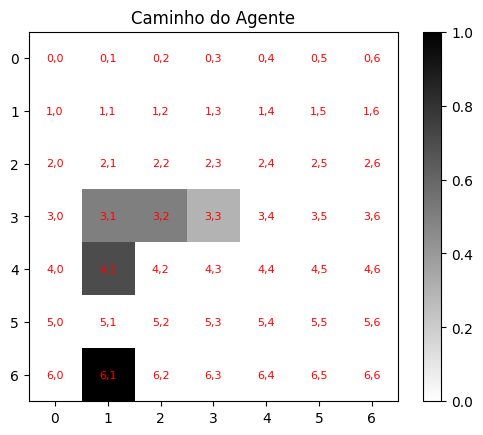

G =  (6, 1)


In [6]:
class GridWorldExperiment:
    def __init__(self, env, agent):
        self.env = env
        self.agent = agent

    def train(self, rounds=100):
        return self.agent.learn(rounds)

    def test_and_plot(self, rewards):
        # Plotando as recompensas ao longo das rodadas
        plt.plot(rewards)
        plt.xlabel('Rodada')
        plt.ylabel('Recompensa Total')
        plt.title('Desempenho do Treinamento')
        plt.show()

        print("##### TESTE DE APRENDIZADO #####")

        # Salvando as ações aprendidas para restaurar após o teste
        original_exp_rate = self.agent.exp_rate

        # Set exp_rate to 0 for testing
        self.agent.adjust_exp_rate(0)

        states = []  # list to store states visited
        total_test_reward = 0  # track the total reward during testing
        counter = 0
        while not self.env.end:
            curr_state = self.agent.pos
            action = self.agent.chooseAction()
            states.append(curr_state)
            next_state, reward, _, _ = self.agent.step(action)  # using the step function to also get the reward
            total_test_reward += reward

            # Print da posição atual e ação
            print(f"Posição: {curr_state}, Ação: {action}, Próxima Posição: {next_state}")

            counter += 1
            if counter > 100:
                print("O agente não conseguiu chegar ao objetivo após 100 movimentos. Interrompendo...")
                break

        print(f"Recompensa total durante o teste: {total_test_reward}")

        # Print the path
        print("\nMelhor caminho encontrado:")
        for s in states:
            print(f"Posição: {s}")

        self.env.visualize_path(states)

        # Restore the original exp_rate
        self.agent.adjust_exp_rate(original_exp_rate)

        self.env.reset()
        self.agent.reset()


# Usage:
env = GridEnv()
agent = Agent(env, input_dim=2, output_dim=4)
experiment = GridWorldExperiment(env, agent)
training_rewards = experiment.train(rounds=20)

experiment.test_and_plot(training_rewards)
print("G = ", G)